# Project: Communicate Data Findings
By: abdulrahman ali

# Analyzing [Ford GoBike System](https://s3.amazonaws.com/fordgobike-data/index.html) Data



## Table of Contents
- [Introduction](#intro)
- [Part I - Gathering Data](#gather)
- [Part II - Assessing Data](#assess)
- [Part III - Cleaning Data](#clean)
- [Part IV - Univariate Exploration](#univariate)
- [Part V - Bivariate Exploration](#bivariate)
- [Part VI - Multivariate Exploration](#multivariate)

<a id='intro'></a>
### Introduction
in this investigation, I wanted to look at the customer behaviour characteristics of the bay Area bike share system. The main focus was on the time (weekday, hour), when bikes were high in demand.

<a id='sources'></a>
## Data Sources

>1. **Name:** data_2018.csv
><ul>   
>    <li><b>Definition:</b> Ford GoBike System - Data</li>
>    <li><b>Source:</b> <a href ="https://www.fordgobike.com/system-data">https://www.fordgobike.com/system-data</a></li>    
>    <li><b>Version:</b>Files 01.2018 </li>
></ul>

<a id='gather'></a>
## Part I - Gathering Data

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import glob
import os

%matplotlib inline

In [3]:
# load the dataset
df = pd.read_csv('data_2018.csv')



<a id='assess'></a>
## Part II - Assessing  Data

In [4]:
# check first records
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [5]:
# Visually check 50 random records
df.sample(50)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
79524,446,2018-01-07 12:54:49.7540,2018-01-07 13:02:16.4660,124,19th St at Florida St,37.760447,-122.410807,139,Garfield Square (25th St at Harrison St),37.751017,-122.411901,1883,Subscriber,1965.0,Male,No
79081,376,2018-01-07 16:23:51.1510,2018-01-07 16:30:07.3210,99,Folsom St at 15th St,37.767037,-122.415443,96,Dolores St at 15th St,37.766210,-122.426614,3160,Subscriber,1981.0,Male,No
21924,871,2018-01-26 06:42:03.3300,2018-01-26 06:56:34.5990,35,Cahill Park,37.329119,-121.904576,290,George St at 1st St,37.347732,-121.899464,1865,Subscriber,1987.0,Male,No
49599,407,2018-01-17 17:17:02.4600,2018-01-17 17:23:50.0260,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,10,Washington St at Kearny St,37.795393,-122.404770,3157,Subscriber,1988.0,Male,No
71279,1162,2018-01-10 18:49:26.9070,2018-01-10 19:08:49.5460,243,Bancroft Way at College Ave,37.869360,-122.254337,215,34th St at Telegraph Ave,37.822547,-122.266318,3547,Subscriber,1972.0,Female,No
49161,447,2018-01-17 18:05:07.6650,2018-01-17 18:12:34.7480,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,89,Division St at Potrero Ave,37.769218,-122.407646,2088,Subscriber,1978.0,Male,No
38850,463,2018-01-21 11:05:12.8580,2018-01-21 11:12:56.1110,34,Father Alfred E Boeddeker Park,37.783988,-122.412408,47,4th St at Harrison St,37.780955,-122.399749,714,Subscriber,1988.0,Female,No
35644,259,2018-01-22 15:19:55.8540,2018-01-22 15:24:15.3080,176,MacArthur BART Station,37.828410,-122.266315,211,Broadway at 40th St,37.827757,-122.256716,3487,Subscriber,1979.0,Male,No
358,198,2018-01-31 20:15:10.3590,2018-01-31 20:18:28.5670,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,342,Colin P Kelly Jr St at Townsend St (Temporary ...,37.781383,-122.389841,3189,Subscriber,1971.0,Male,No
41559,485,2018-01-20 08:23:43.4820,2018-01-20 08:31:48.6620,321,5th at Folsom,37.780146,-122.403071,321,5th at Folsom,37.780146,-122.403071,3152,Subscriber,1984.0,Male,No


In [6]:
# View info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 16 columns):
duration_sec               94802 non-null int64
start_time                 94802 non-null object
end_time                   94802 non-null object
start_station_id           94802 non-null int64
start_station_name         94802 non-null object
start_station_latitude     94802 non-null float64
start_station_longitude    94802 non-null float64
end_station_id             94802 non-null int64
end_station_name           94802 non-null object
end_station_latitude       94802 non-null float64
end_station_longitude      94802 non-null float64
bike_id                    94802 non-null int64
user_type                  94802 non-null object
member_birth_year          86963 non-null float64
member_gender              87001 non-null object
bike_share_for_all_trip    94802 non-null object
dtypes: float64(5), int64(4), object(7)
memory usage: 11.6+ MB


In [7]:
# Check if duplicates exist
df.duplicated().sum()

0

In [8]:
# View descriptive statistics of the dataframe
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,94802.000000,94802.000000,94802.000000,94802.000000,94802.00000,94802.000000,94802.000000,94802.000000,86963.000000
mean,870.935930,103.766302,37.773321,-122.361677,101.00982,37.773536,-122.360776,2048.751609,1980.932420
std,2550.596891,87.730464,0.085744,0.105253,86.77949,0.085552,0.104580,1091.507513,10.803017
min,61.000000,3.000000,37.317298,-122.444293,3.00000,37.317298,-122.444293,11.000000,1900.000000
25%,359.000000,30.000000,37.771662,-122.412408,27.00000,37.773063,-122.411306,1133.000000,1975.000000
50%,555.000000,79.000000,37.781270,-122.398773,76.00000,37.781752,-122.398436,2151.500000,1983.000000
75%,854.000000,160.000000,37.795392,-122.390428,157.00000,37.795392,-122.390428,3015.000000,1989.000000
max,85546.000000,342.000000,37.880222,-121.874119,342.00000,37.880222,-121.874119,3744.000000,2000.000000


In [9]:
df[df.member_birth_year.isnull()].head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
5,6477,2018-01-31 22:58:44.8670,2018-02-01 00:46:41.9080,236,Market St at 8th St,37.803686,-122.282497,160,West Oakland BART Station,37.805318,-122.294837,1306,Customer,NaN,NaN,No
10,1316,2018-01-31 23:24:00.4160,2018-01-31 23:45:56.8240,98,Valencia St at 16th St,37.765052,-122.421866,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,1278,Customer,NaN,NaN,No
18,350,2018-01-31 23:13:45.5290,2018-01-31 23:19:36.2650,247,Fulton St at Bancroft Way,37.867789,-122.265896,274,Oregon St at Adeline St,37.857567,-122.267558,431,Subscriber,NaN,NaN,No


<a id='assessingsum'></a>
### Assessing Summary

#### Quality
##### df table
- there are missing values in the member_birth_year and member_gender columns
- the columns 'start_time' and 'end_time' are not datetime type
- the columns 'start_station_id', 'end_station_id'and 'bike_id' are not object type
- user type, gender and bike_share_for_all_trip can be set to category
- we can calculate the age of the user

- member birth year has dates prior to 1900
- some stations share the same ID while they changed the position over time (consistency problem)

#### Tidiness
##### df table
- None

<a id='cleaning'></a>
## Data Cleaning

In [10]:
# Create copies of original DataFrames
df_clean = df.copy()

### Issue 
> #### Define 
>- there are missing values in the member_birth_year and member_gender columns

> #### Clean 

In [11]:
#there are multiple ways how to handle this - but since the coordinates are not precise we will just drop them
df_clean.dropna(subset = ["start_station_id"], inplace = True)

In [12]:
#fill up the missing values
df_clean.member_birth_year.fillna(0, inplace = True)
df_clean.member_gender.fillna("not defined", inplace = True)

> #### Test 

In [13]:
df_clean[df_clean.member_birth_year.isnull()].head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


### Issue 
> #### Define
>- the columns 'start_time' and 'end_time' are not datetime type
>- the columns 'start_station_id', 'end_station_id' and 'bike_id' are not object type

> #### Clean 

In [14]:
for col in ["start_time", "end_time"]:
    df_clean[col] = pd.to_datetime(df_clean[col])
    
for col in ["start_station_id", "end_station_id"]:
    df_clean[col] = df_clean[col].astype("int")

for col in ["start_station_id", "end_station_id", "bike_id"]:
    df_clean[col] = df_clean[col].astype("str")

> #### Test 

In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94802 entries, 0 to 94801
Data columns (total 16 columns):
duration_sec               94802 non-null int64
start_time                 94802 non-null datetime64[ns]
end_time                   94802 non-null datetime64[ns]
start_station_id           94802 non-null object
start_station_name         94802 non-null object
start_station_latitude     94802 non-null float64
start_station_longitude    94802 non-null float64
end_station_id             94802 non-null object
end_station_name           94802 non-null object
end_station_latitude       94802 non-null float64
end_station_longitude      94802 non-null float64
bike_id                    94802 non-null object
user_type                  94802 non-null object
member_birth_year          94802 non-null float64
member_gender              94802 non-null object
bike_share_for_all_trip    94802 non-null object
dtypes: datetime64[ns](2), float64(5), int64(1), object(8)
memory usage: 12.3+ MB


### Issue 
> #### Define 
>-  user type, gender and bike_share_for_all_trip can be set to category


> #### Clean 

In [16]:
# set user type, gender and bike_share_for_all_trip to category
df_clean.user_type = df_clean.user_type.astype('category')
df_clean.member_gender = df_clean.member_gender.astype('category')
df_clean.bike_share_for_all_trip = df_clean.bike_share_for_all_trip.astype('category')

**Test**


In [17]:
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94802 entries, 0 to 94801
Data columns (total 16 columns):
duration_sec               94802 non-null int64
start_time                 94802 non-null datetime64[ns]
end_time                   94802 non-null datetime64[ns]
start_station_id           94802 non-null object
start_station_name         94802 non-null object
start_station_latitude     94802 non-null float64
start_station_longitude    94802 non-null float64
end_station_id             94802 non-null object
end_station_name           94802 non-null object
end_station_latitude       94802 non-null float64
end_station_longitude      94802 non-null float64
bike_id                    94802 non-null object
user_type                  94802 non-null category
member_birth_year          94802 non-null float64
member_gender              94802 non-null category
bike_share_for_all_trip    94802 non-null category
dtypes: category(3), datetime64[ns](2), float64(5), int64(1), object(5)
memory us

### Issue 
> #### Define 
>-  we can calculate the age of the user

> #### Clean 

In [18]:
# substract the birth year from the current year
df_clean['member_age'] = 2019-df_clean['member_birth_year']

In [19]:
df_clean.head(30)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No,33.0
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,0.0,not defined,No,2019.0
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No,23.0
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,0.0,not defined,No,2019.0
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No,28.0
5,6477,2018-01-31 22:58:44.867,2018-02-01 00:46:41.908,236,Market St at 8th St,37.803686,-122.282497,160,West Oakland BART Station,37.805318,-122.294837,1306,Customer,0.0,not defined,No,2019.0
6,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988.0,Male,No,31.0
7,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81,Berry St at 4th St,37.775880,-122.393170,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980.0,Male,No,39.0
8,996,2018-01-31 23:34:56.004,2018-01-31 23:51:32.674,134,Valencia St at 24th St,37.752428,-122.420628,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,3675,Subscriber,1987.0,Male,Yes,32.0
9,825,2018-01-31 23:34:14.027,2018-01-31 23:47:59.809,305,Ryland Park,37.342725,-121.895617,317,San Salvador St at 9th St,37.333955,-121.877349,1453,Subscriber,1994.0,Female,Yes,25.0


**Define**
<br>Enhance dataset with new date related fields

**Code**

In [20]:
# extract start time month name
df_clean['start_time_month_name']=df_clean['start_time'].dt.strftime('%B')

In [21]:
# extract start time month number
df_clean['start_time_month']=df_clean['start_time'].dt.month.astype(int)

In [22]:
# extract start time weekdays
df_clean['start_time_weekday']=df_clean['start_time'].dt.strftime('%a')

In [23]:
# extract start time day
df_clean['start_time_day']=df_clean['start_time'].dt.day.astype(int)

In [24]:
# extract start time hour
df_clean['start_time_hour']=df_clean['start_time'].dt.hour

**Test**

In [25]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_time_month_name,start_time_month,start_time_weekday,start_time_day,start_time_hour
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,...,Subscriber,1986.0,Male,No,33.0,January,1,Wed,31,22
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,Customer,0.0,not defined,No,2019.0,January,1,Wed,31,16
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,...,Customer,1996.0,Male,No,23.0,January,1,Wed,31,14
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,...,Customer,0.0,not defined,No,2019.0,January,1,Wed,31,14
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,...,Subscriber,1991.0,Male,No,28.0,January,1,Wed,31,19


In [26]:
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94802 entries, 0 to 94801
Data columns (total 22 columns):
duration_sec               94802 non-null int64
start_time                 94802 non-null datetime64[ns]
end_time                   94802 non-null datetime64[ns]
start_station_id           94802 non-null object
start_station_name         94802 non-null object
start_station_latitude     94802 non-null float64
start_station_longitude    94802 non-null float64
end_station_id             94802 non-null object
end_station_name           94802 non-null object
end_station_latitude       94802 non-null float64
end_station_longitude      94802 non-null float64
bike_id                    94802 non-null object
user_type                  94802 non-null category
member_birth_year          94802 non-null float64
member_gender              94802 non-null category
bike_share_for_all_trip    94802 non-null category
member_age                 94802 non-null float64
start_time_month_name      9480

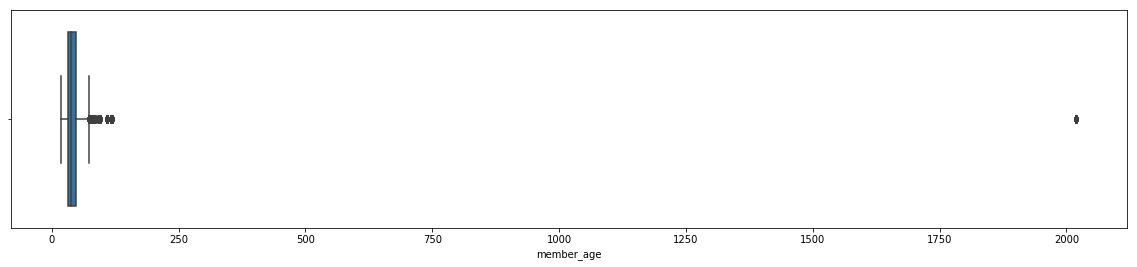

In [27]:
# code for the age boxplot

plt.figure(figsize = [20, 4])
base_color = sns.color_palette()[0]

sns.boxplot(data=df_clean, x='member_age', color=base_color);

In [28]:
df_clean.member_age.mean()

201.86717579797894

In [29]:
df_clean.member_age.describe(percentiles = [ .95])

count    94802.000000
mean       201.867176
std        545.670061
min         19.000000
50%         37.000000
95%       2019.000000
max       2019.000000
Name: member_age, dtype: float64

**Define**
<br>Remove age outliers. As mentioned in the [Quality issues](#issues), there are customers with the birth year before 1900 thus customers with age above 100 years. As 95% of the users are below 58 , I am going to keep users below 60.

**Code**

In [30]:
# Keep records below 60, it automatically removes null values
df_clean = df_clean.query('member_age <=60')

In [31]:
# change age and birth year to integer
df_clean.member_age = df_clean.member_age.astype(int)
df_clean.member_birth_year = df_clean.member_birth_year.astype(int)

**Test**

In [32]:
df_clean.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,member_age,start_time_month,start_time_day,start_time_hour
count,83771.000000,83771.000000,83771.000000,83771.000000,83771.000000,83771.000000,83771.000000,83771.0,83771.000000,83771.000000
mean,727.159924,37.773623,-122.361421,37.773772,-122.360437,1982.091858,36.908142,1.0,17.520335,13.223407
std,1809.510654,0.084971,0.104597,0.084742,0.103862,8.957783,8.957783,0.0,8.870918,4.685302
min,61.000000,37.317298,-122.444293,37.317298,-122.444293,1959.000000,19.000000,1.0,1.000000,0.000000
25%,351.000000,37.771662,-122.412408,37.772406,-122.411306,1977.000000,30.000000,1.0,10.000000,9.000000
50%,534.000000,37.781270,-122.398525,37.781270,-122.397405,1984.000000,35.000000,1.0,18.000000,13.000000
75%,805.000000,37.795392,-122.390428,37.795392,-122.390428,1989.000000,42.000000,1.0,25.000000,17.000000
max,84609.000000,37.880222,-121.874119,37.880222,-121.874119,2000.000000,60.000000,1.0,31.000000,23.000000


In [33]:
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83771 entries, 0 to 94800
Data columns (total 22 columns):
duration_sec               83771 non-null int64
start_time                 83771 non-null datetime64[ns]
end_time                   83771 non-null datetime64[ns]
start_station_id           83771 non-null object
start_station_name         83771 non-null object
start_station_latitude     83771 non-null float64
start_station_longitude    83771 non-null float64
end_station_id             83771 non-null object
end_station_name           83771 non-null object
end_station_latitude       83771 non-null float64
end_station_longitude      83771 non-null float64
bike_id                    83771 non-null object
user_type                  83771 non-null category
member_birth_year          83771 non-null int32
member_gender              83771 non-null category
bike_share_for_all_trip    83771 non-null category
member_age                 83771 non-null int32
start_time_month_name      83771 no

In [34]:
# save cleaned data 
df_clean.to_csv('clean_data_file.csv', index=False)

​
<a id='univariate'></a>
## Part IV - Univariate Exploration
​
I'll start by looking at distribution of weekdays and hours of the day. I will also explore the duration of the trips.

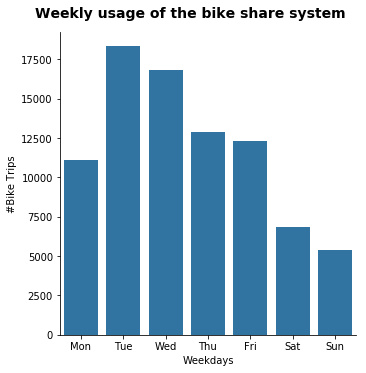

In [35]:
# weekday usege of the bike sharing system

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=df_clean, x='start_time_weekday', kind='count', color = base_color, order = weekday)
g.set_axis_labels("Weekdays", "#Bike Trips")
g.fig.suptitle('Weekly usage of the bike share system', y=1.03, fontsize=14, fontweight='semibold');

The bike share system is mainly used during weekdays, with Tuesday and wed as the most popular days for bike rides. The system is most probably used as a daily work/school commute.

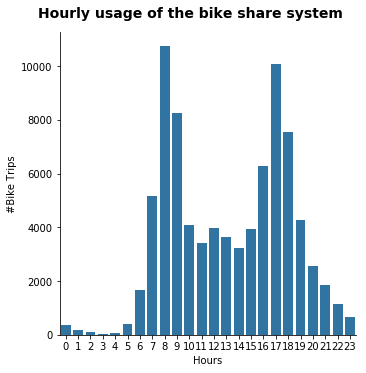

In [36]:
# hourly usege of the bike sharing system

g = sns.catplot(data=df_clean, x='start_time_hour', kind='count', color = base_color)
g.set_axis_labels("Hours", "#Bike Trips")
g.fig.suptitle('Hourly usage of the bike share system', y=1.03, fontsize=14, fontweight='semibold');

The hourly distribution is bimodal, the system is used mainly around 8-9am and 5-6pm when people get to and gat back from work.

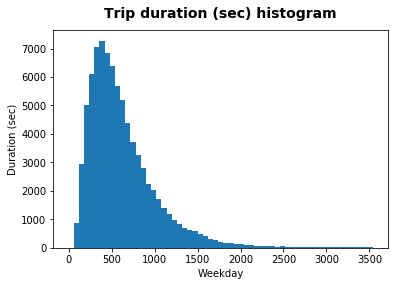

In [37]:
# code for the (histogram) duration (sec) distribution per user type

bin_edges = np.arange(0, 3600,60)

plt.hist(data = df_clean, x = 'duration_sec', bins = bin_edges)

plt.title("Trip duration (sec) histogram", y=1.03, fontsize=14, fontweight='semibold')
plt.xlabel('Weekday')
plt.ylabel('Duration (sec)');

Looking at the histogram, we can see that trip durations are no longer than 30 min (1800 sec) and usually last 6 to 15 min. This can be explained by two facts:
1. The way the system works: single trips and 24h or 72h access pass are free of additional charge for trips up to 30 min, otherwise you pay extra $3 for additional 15 min. Only the monthly pass offers free of charge 45 min rides.
2. The way the system is used: as is looks like people use the system for commuting, they trips are usually short in time probably due to the closeness of their homes to workplace/school.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There was one unusal points for the duration (sec), which in some cases lasted more than 24h. For the histogram I set the max range to 3600 sec = 60 min.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There was one unusal distribution for the member birth year, which in some cases was dated before 1900. Since 95% of the members are between 17 and 57 years, I removed users older than 60.

<a id='bivariate'></a>
## Part V - Bivariate Exploration

In this section I will further explore the dataset by adding the customer type to the analysis.

In [38]:
# calculating % split for the user type
customer = df_clean.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_clean.query('user_type == "Subscriber"')['bike_id'].count()

customer_proportion = customer / df_clean['bike_id'].count()
subscriber_proportion = subscriber / df_clean['bike_id'].count()

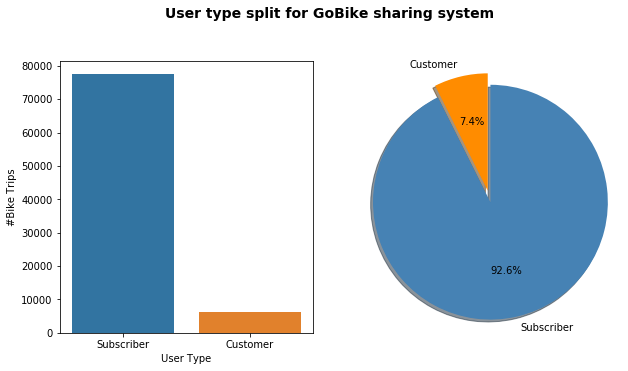

In [39]:
plt.figure(figsize = [10, 5])

# code for the bar chart
plt.subplot(1, 2, 1)

g = sns.countplot(data=df_clean, x="user_type", order=df_clean.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('#Bike Trips')

# code for the pie chart
plt.subplot(1, 2, 2)

labels = ['Customer', 'Subscriber']
sizes = [customer_proportion, subscriber_proportion]
colors = ['darkorange', 'steelblue']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('User type split for GoBike sharing system', y=1.03, fontsize=14, fontweight='semibold');

The bike sharing system is mainly used by subscribers (93%) than ocassional riders (7%).
<br>
<br>Next I am going to explore the renting trends per each user type.

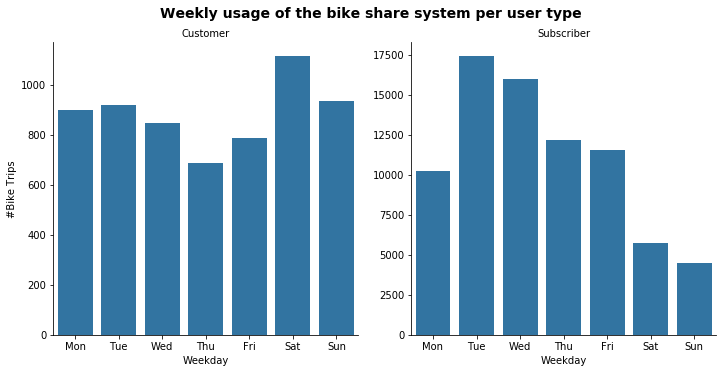

In [40]:
# weekday usege of the bike sharing system per user type

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=df_clean, x='start_time_weekday', col="user_type", kind='count', sharey = False,
            color = base_color, order = weekday)
g.set_axis_labels("Weekday", "#Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Weekly usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='semibold');

There is a different trend on which days customers and subscribers rent bikes. As mentioned above **customers** are most probably occasional riders and tourist who use the bike sharing system on holiday or weekend trips. On the other hand, **subscribers** are most probably daily work/school commuters who use the system within a week.
<br>
<br>Next, I am going to check when within a day bikes are high in demand.

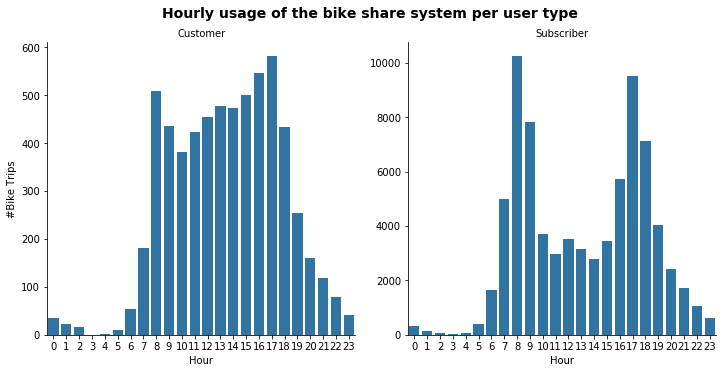

In [41]:
# hourly usege of the bike sharing system per user type

g = sns.catplot(data=df_clean, x='start_time_hour', col="user_type", kind='count', sharey = False,
            color = base_color)
g.set_axis_labels("Hour", "#Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='semibold');

There is also a different trend of when during the day bikes are rented most often. **Customers** use bikes mainly between 8 am - 7 pm, reaching the renting peak around 5pm. **Subscribers** on the other side use the system at around 8-9am and 5-6pm when they go and come back from work.
<br>
<br>Next, I am going to check how the trip duration varies between customers and subscribers.

C:\Users\abodahim\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


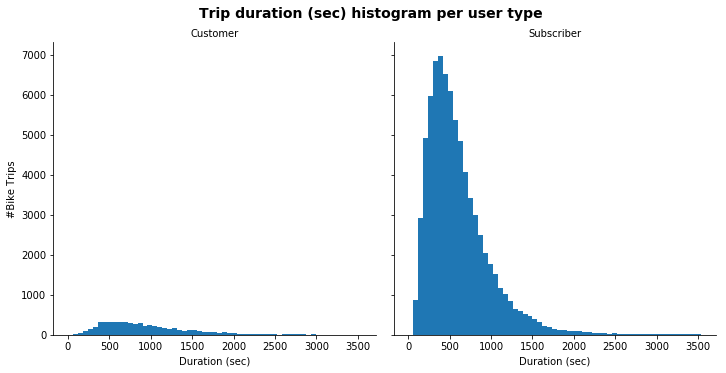

In [42]:
# code for the (histogram) duration (sec) distribution per user type

g = sns.FacetGrid(df_clean, col="user_type", margin_titles=True, size=5)
bin_edges = np.arange(0, 3600,60)
g.map(plt.hist, "duration_sec", color=base_color, bins=bin_edges)
g.set_axis_labels("Duration (sec)", "#Bike Trips")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Trip duration (sec) histogram per user type', y=1.03, fontsize=14, fontweight='semibold');

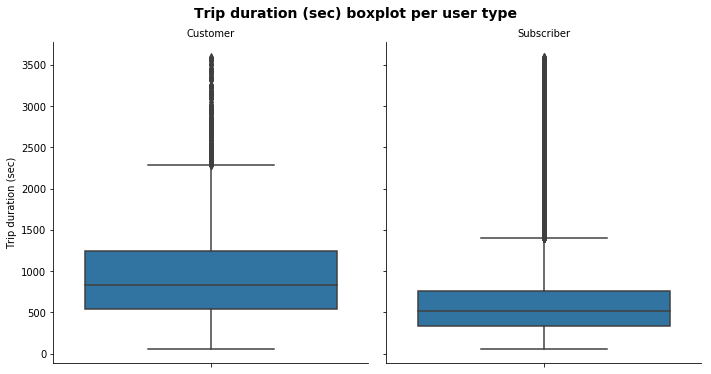

In [43]:
# code for the (boxplot) duration (sec) distribution per user type

data = df_clean.query('duration_sec < 3600')
g = sns.catplot(data=data, y='duration_sec', col="user_type", kind='box',
            color = base_color)
g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Trip duration (sec)")
g.fig.suptitle('Trip duration (sec) boxplot per user type', y=1.03, fontsize=14, fontweight='semibold');

Looking at both charts (histograms and box plots), we can see that trip durations are longer for customers (9 to 23 minutes) than for subscribers (7 to 13 minutes). This can probably be explained by the fact that subscribers are mainly commuters who take short trips to work/school rather than longer trips around the Bay Area.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Adding the user type to the analysis depicted different usage behaviours between customers and subscribers. As mentioned above **customers** are casual riders, most probably tourists who rent bikes mainly in summertime (the peak in July), more often during weekends than weekdays and they rent bikes more often within the day rather than around commute hours (8-9am and 5-6pm). **Subscribers** are daily commuters, who also use the system around summertime, May-October (with the peak in October). They rent bikes more often during weekdays than weekends and mainly around the time they go and go back from work or school (8-9am and 5-6pm).

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is a difference in the trip duration between customers and subscribers. **Customers** trips are usually longer than for subscribers, most probably due to the fact they prefer bike rides around weekends in summertime, what encourages longer trips around the area. **Subscribers** on the other hand use the system mainly for commute purposes so they rather prefer quick rides to and from work/school.

<a id='multivariate'></a>
## Part VI - Multivariate Exploration

In this section I will further explore the dataset by adding gender to the customer type and check the hourly distribution of bike rides during weekdays for customers and subscribers.

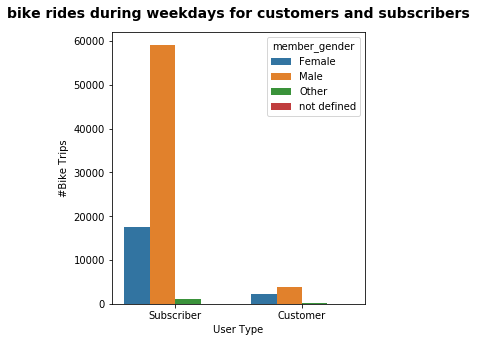

In [51]:
plt.figure(figsize = [10, 5])

# code for the bar chart
plt.subplot(1, 2, 1)

g = sns.countplot(data=df_clean, x="user_type", hue="member_gender", order=df_clean.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('#Bike Trips')
g.set_title('bike rides during weekdays for customers and subscribers', y=1.03 , fontsize=14, fontweight='semibold');

In general, males are using the system more often than females and others (the registration system allows you to choose 'Other' as a gender). However, the ratio is much smaller between males and females for **customers** (more ore less 2:1) than for **subscribers** (3:1).
<br>
<br>Let's explore if gender affects the way the bike system is used within a year, weekdays and hours of the day.

In [ ]:
# weekday usege of the bike sharing system per user type and gender

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=df_clean, x='start_time_weekday', col="user_type", hue='member_gender', kind='count', sharey = False,
                order = weekday)
g.set_axis_labels("Weekday", "#Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Weekly usage of the bike share system per user type and gender', y=1.03, fontsize=14, fontweight='semibold');

As in the previous section, the trend is very similar for males and females: **customers** use the system more often during weekends than within a week (although the jump in bike used on weekends is much higher for females than for males); **subscribers** use the system mainly within a week.

In [ ]:
# hourly usege of the bike sharing system per user type and gender

g = sns.catplot(data=df_clean, x='start_time_hour', col="user_type", hue='member_gender', kind='count', sharey = False)
g.set_axis_labels("Hour", "#Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage of the bike share system per user type and gender', y=1.03, fontsize=14, fontweight='semibold');

During the day, both males and females use the system the same way: **customers** use bikes mainly between 8 am - 7 pm; **subscribers** on the other side use the system at around 8-9am and 5-6pm when they go and come back from work.

In [ ]:
# code for the (violinplot) duration (sec) distribution per user type and gender

g = sns.catplot(data=data, x='user_type', y="duration_sec", hue="member_gender", kind="violin")

g.set_axis_labels("User Type", "Trip duration (sec)")
g._legend.set_title('Gender')
g.fig.suptitle('Trip duration per user type and gender', y=1.03, fontsize=14, fontweight='semibold');

Here we can observe that in both cases, females take longer trips (measured in time) than males and other. The difference is more visible for **customers** (~13 min for males and other vs ~15 for females) than for **subscribers** (the difference is quite small).

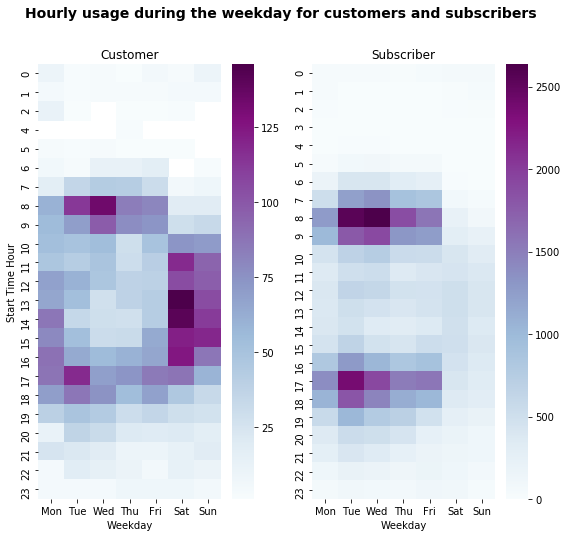

In [45]:
# Setting the weekday order
df_clean['start_time_weekday'] = pd.Categorical(df_clean['start_time_weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(9,8))
plt.suptitle('Hourly usage during the weekday for customers and subscribers', fontsize=14, fontweight='semibold')

# heatmap for customers
plt.subplot(1, 2, 1)
df_customer = df_clean.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "bike_id")
sns.heatmap(df_customer, cmap="BuPu")

plt.title("Customer", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

# heatmap for subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_clean.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_weekday", "bike_id")
sns.heatmap(df_subscriber, cmap="BuPu")

plt.title("Subscriber", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('');

The plot perfectly summarizes in one place the diffrent trends for customers and subscribers I was writing up before.
<br>
#### Customers use the bike sharing system more often on weekends:
 * weekdays: most bike rides hapen around 8-9am and 5-6pm with the peak on Fridays around 5pm
 * weekends: most bike rides happen between 10am - 8pm with the peak on Saturdays around 2pm

#### Subscribers use the bike sharing system mainly on weekdays:
 * weekdays: most bike rides hapen around 8-9am and 5-6pm with the peak on Tuesdays around 8am
 * weekends: bikes are still rented but there is a significant drop in numbers of rented bikes throughout the entire weekends

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Plotting a heatmap of when bikes are high in demand throughout the day on each weekday shed a new light on the customers behaviour. Plotting #bike trips throughout the day and #bike trips within the weekdays separately gave the impression that the demand for bikes is quite high throughout the day with a peak around 5pm which is not entirely true. The trend within weekdays for customers follows (although customers are rather not early birds) the one for subscribers who rent bikes mainly around commute hours (8-9am and 5-6pm). For customers, as depicted in univariate explorations, most of the trips happen on weekends but mainly between 10am - 8pm with the peak on Saturdays around 2pm, what was previosly not visible.

### Were there any interesting or surprising interactions between features?

> most probably due to the weather condition. Moreover, I have checked if there are some differences in trends for genders. In most cases the trend for males/females was the same, except of the fact that females tend to have slightly longer trips and suprisingly.
